Medicine Recommendation system

In [1]:
#Library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
#Import Models 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve



Load Dataset 

In [2]:
dataset = pd.read_csv('dataset/Training.csv')

In [3]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
dataset.shape

(4920, 133)

In [5]:
dataset.isnull().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [6]:
dataset.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
dataset.prognosis.value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [9]:
len(dataset.prognosis.value_counts()) #total unique no. of desiese 

41

In [10]:
dataset.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [11]:
X = dataset.drop('prognosis' , axis = 1)
y = dataset['prognosis']

In [12]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [13]:
Y

array([15, 15, 15, ..., 38, 35, 27])

In [14]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [15]:
Y

array([15, 15, 15, ..., 38, 35, 27])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.3, random_state=42)

In [17]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
682,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3963,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4480,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
373,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3857,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4767,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:


# Initialize the models
models = {
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MultinomialNB': MultinomialNB()
}

# Define the parameter grids for each model
param_grids = {
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5]
    },
    'MultinomialNB': {
        'alpha': [0.1, 0.5, 1.0]
    }
}

# Initialize a dictionary to store the best models
best_models = {}

# Perform GridSearchCV for each model
for model_name, param_grid in param_grids.items():
    grid_search = GridSearchCV(models[model_name], param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Evaluate the best models
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy, 'confusion_matrix': cm}

# Print the results
for model_name, result in results.items():
    print(f"{model_name} best accuracy: {result['accuracy']}")
    print(f"{model_name} confusion matrix:\n{result['confusion_matrix']}")




In [29]:
rf = RandomForestClassifier(n_estimators= 100 , random_state=42)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
accuracy


1.0

In [30]:
svc = SVC(kernel = 'linear')
svc = SVC(kernel = 'linear')
svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
accuracy

1.0

In [31]:
import pickle 
pickle.dump(rf , open('model/rf.pkl','wb') )# for RF model 

 
pickle.dump(svc , open('model/svc.pkl','wb') )# for  Svc model 

In [32]:
#load model 
rf = pickle.load(open("model/rf.pkl", 'rb'))
svc = pickle.load(open("model/svc.pkl", 'rb'))

In [33]:
rf

RandomForestClassifier(random_state=42)

In [34]:
X_test.iloc[1].values.reshape(1,-1) # test 1 


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [35]:
# test from Rf
rf.predict([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])    

array([2])

In [64]:
svc.predict([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

array([2])

In [36]:
X_test.iloc[7].values.reshape(1,-1)  # test 2 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [37]:
rf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([5])

In [38]:
y_test 

array([ 2,  2, 24, ..., 30, 26, 11])

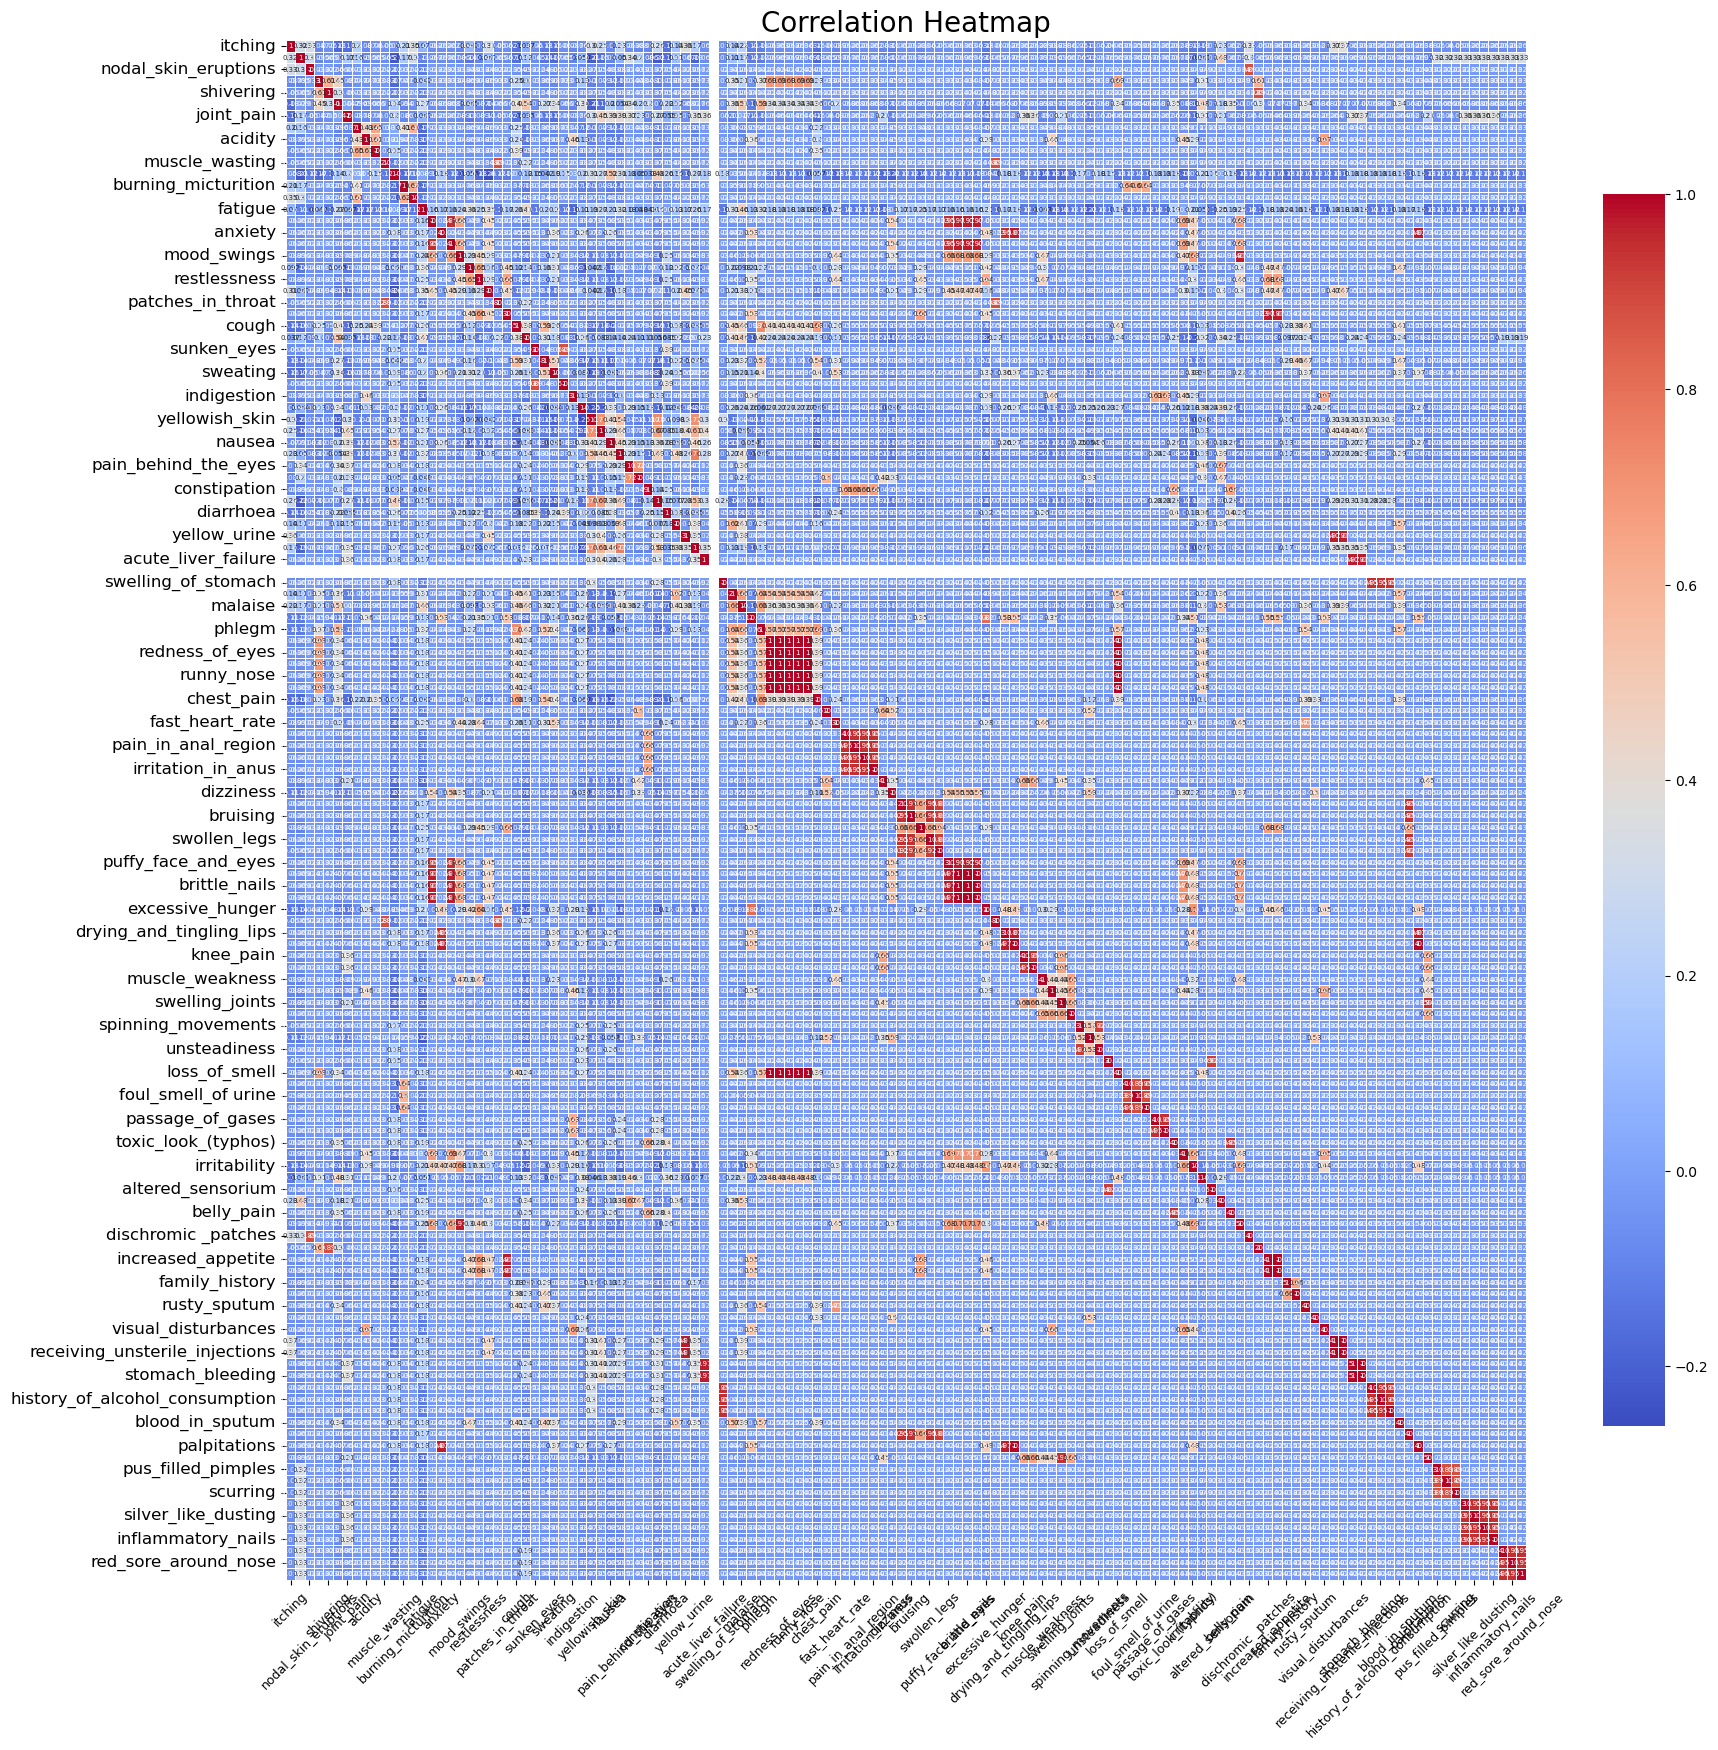

In [39]:
# Correlation Heatmap
plt.figure(figsize=(20, 20))

# Drop the non-numeric 'prognosis' column
numeric_dataset = dataset.drop(columns=['prognosis'])

# Compute the correlation matrix
corr_matrix = numeric_dataset.corr()

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.7, 
    annot_kws={"size": 5},  # Adjust annotation size
    cbar_kws={"shrink": 0.8}  # Adjust color bar size
)

# Set title with larger font size
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=9, rotation=45)  # Adjust x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels

plt.show()


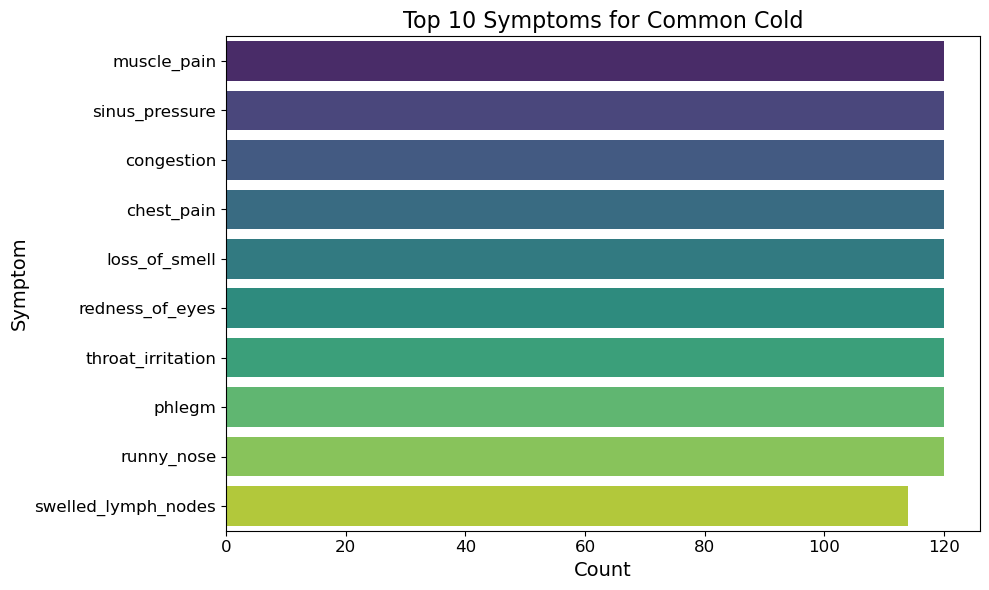

In [40]:


def plot_symptoms_distribution(disease_name, top_n=10):
    # Filter dataset for the specific disease
    symptoms_counts = dataset[dataset['prognosis'] == disease_name].drop('prognosis', axis=1).sum().sort_values(ascending=False)
    top_symptoms = symptoms_counts.head(top_n)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_symptoms.values, y=top_symptoms.index, palette='viridis')
    plt.title(f'Top {top_n} Symptoms for {disease_name}', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Symptom', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

plot_symptoms_distribution('Common Cold')


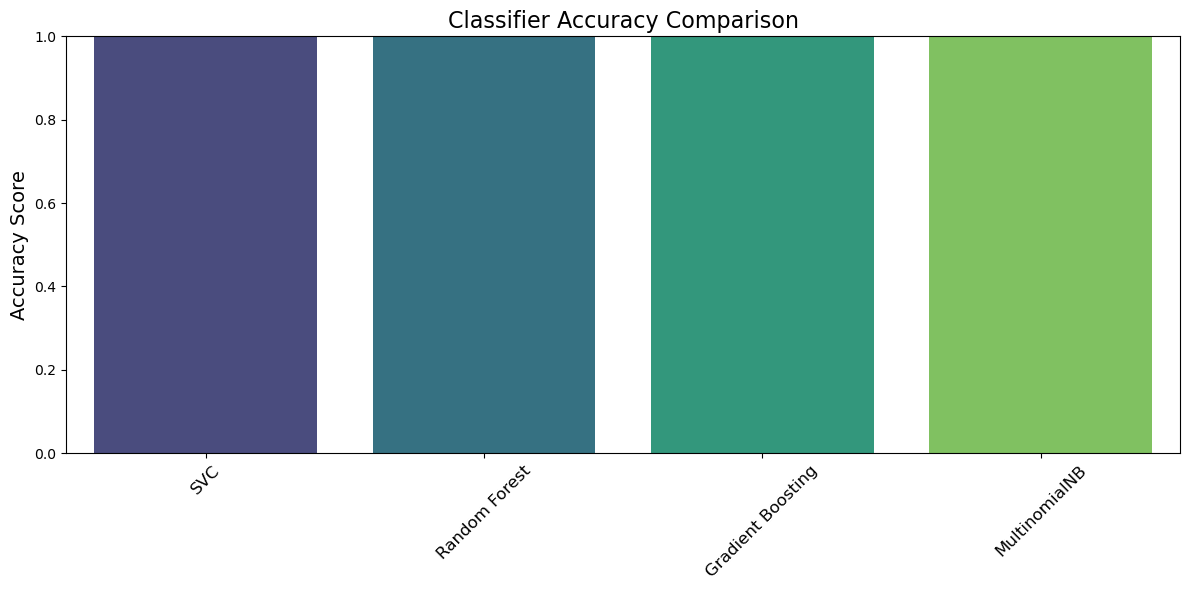

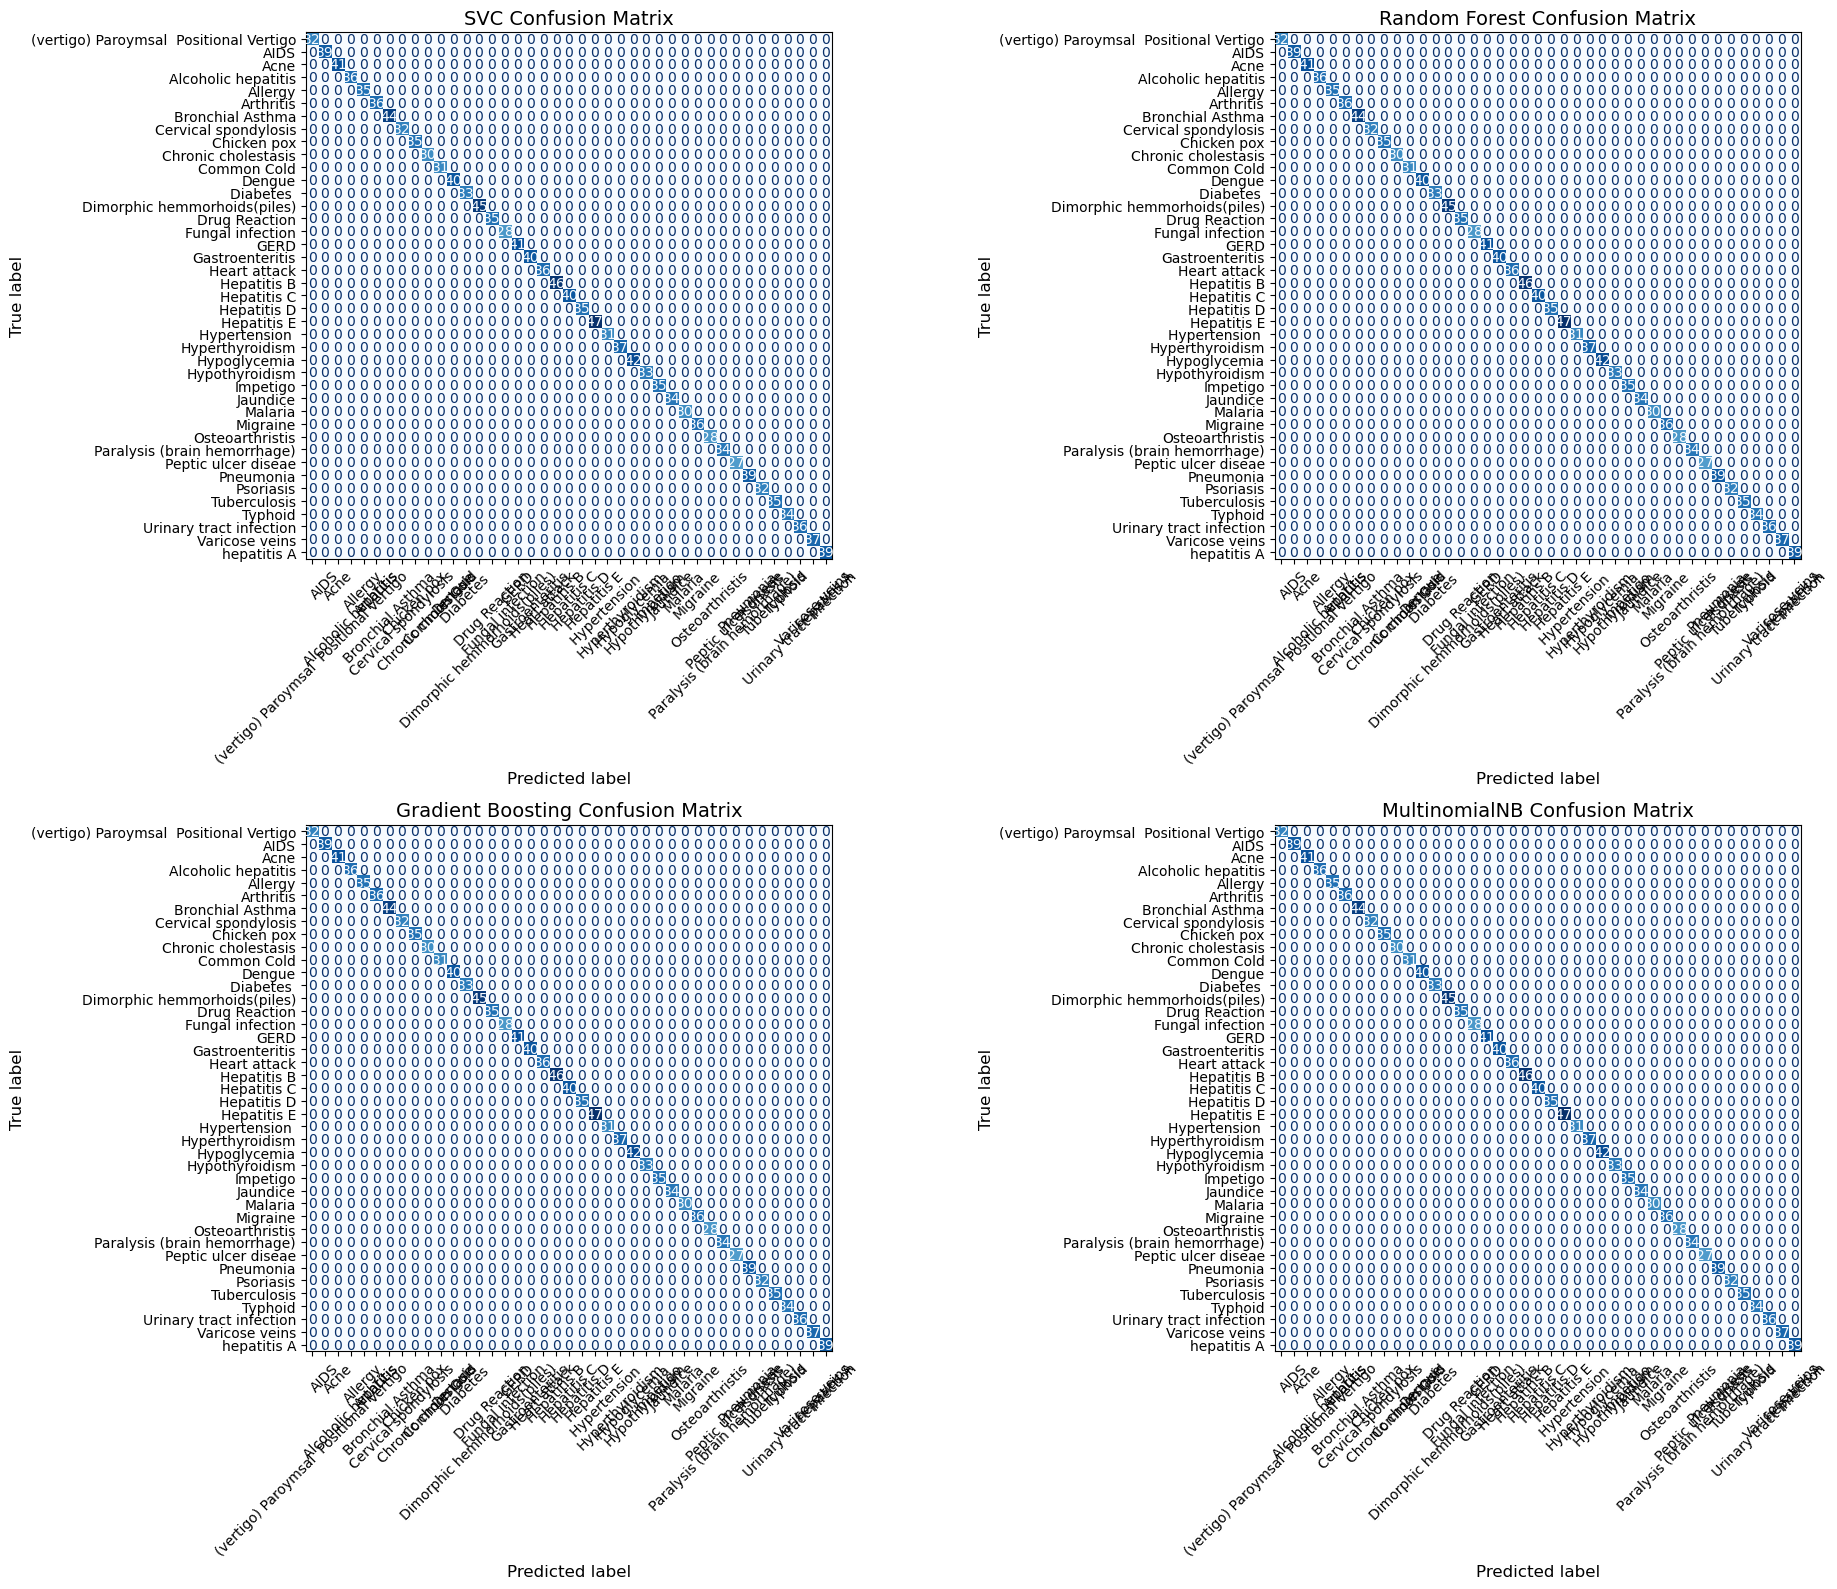

In [42]:

# Define models
models = {
    'SVC': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'MultinomialNB': MultinomialNB()
}

# Fit and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy, 'confusion_matrix': cm}

# Plot accuracy scores
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=[result['accuracy'] for result in results.values()], palette='viridis')
plt.title('Classifier Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0, 1)
plt.xticks(fontsize=12, rotation=45)
plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
for ax, (model_name, result) in zip(axes.flatten(), results.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=result['confusion_matrix'], display_labels=le.classes_)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation=45)
    ax.set_title(f'{model_name} Confusion Matrix', fontsize=14)
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)

plt.tight_layout()
plt.show()




MAke Recommendation And Predetion 

In [43]:
#load few data set 

precaution = pd.read_csv("dataset/precautions_df.csv")
workout = pd.read_csv("dataset/workout_df.csv")
medication = pd.read_csv('dataset/medications.csv')
diets = pd.read_csv('dataset/diets.csv')
description = pd.read_csv("dataset/description.csv")


In [44]:
#healper Function 

def helper(dis):
    descr = description[description['Disease'] == dis ]['Description']
    descr = " ".join({ w for w in descr})
    
    pre = precaution[precaution['Disease'] == dis ][['Precaution_1',	'Precaution_2',	'Precaution_3'	,'Precaution_4']]
    pre  = [col for col in pre.values]


    die = diets[diets['Disease']== dis ]['Diet']
    die = [die for die in die.values]
    work = workout[workout['disease']== dis ]['workout']

    med = medication[medication['Disease'] == dis ]['Medication']
    med = [med for med in med.values]

    return descr , pre , die , med, work





symptom_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}

diseases_list = {15: 'Fungal infection', 20: 'Hepatitis C', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 21: 'Hepatitis D', 19: 'Hepatitis B', 4: 'Allergy', 40: 'hepatitis A', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 27: 'Impetigo'}




#model prediction 

def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptom_dict))
    for item in patient_symptoms:
        input_vector[symptom_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [45]:
symptoms = input('Enter Your Symptoms Here..')
user_symptoms = [ s for s in symptoms.split(',')]
user_symptoms = [ sym.strip("[]'") for sym in user_symptoms]

predicted_disease = get_predicted_value(user_symptoms)
descr , pre , die , med, work = helper(predicted_disease)

#Result Time 
print('********************************Predicted Disease ************************************')
print("  Prediction is:-", predicted_disease )
print('********************************Predicted Description ************************************')
print(descr)
print('********************************Predicted Precaution ************************************')
i = 1
for j in pre[0]:
    print(i , ':' , j)
    i += 1
print('********************************Predicted Diets ************************************')
for i in die:
    
    print(i)
    
print('********************************Predicted Medication ************************************')
i = 1 
for j in med:
    print(i, ":", j)
    i+= 1 
print('********************************Predicted workout ************************************')
i = 1 
for j in med:
    print(i, ":", j)
    i+= 1 


Enter Your Symptoms Here..itching
********************************Predicted Disease ************************************
  Prediction is:- Fungal infection
********************************Predicted Description ************************************
Fungal infection is a common skin condition caused by fungi.
********************************Predicted Precaution ************************************
1 : bath twice
2 : use detol or neem in bathing water
3 : keep infected area dry
4 : use clean cloths
********************************Predicted Diets ************************************
['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
********************************Predicted Medication ************************************
1 : ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
********************************Predicted workout ************************************
1 : ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketocona

In [46]:
 predicted_disease


'Fungal infection'